In [1]:
#Run in Xception environment 
import h5py 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import os
import glob
import plotly
import plotly.express as ex
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
# Preprocessing the data
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input


from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Model,load_model
from tensorflow.keras.layers import Dense, Dropout,Conv2D,Flatten,MaxPooling2D
from keras import backend as K
from tensorflow.keras.layers.experimental import preprocessing
import visualkeras
from keras.utils import plot_model
from keras_tuner.tuners import GridSearch
from keras_tuner import HyperModel
from keras_tuner.tuners import Hyperband

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
## Images are of different sizes fixing the size to 64 x 64
im_size = 64
BATCH_SIZE = 32
NUM_CLASSES = 5 ## since there are 2 distinct classes

In [3]:
# Define Training and Validation Data Generator with Augmentations
gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.4,
    zoom_range=0.4
)

In [4]:
# Flow the data into the Data Generator
Train_gen = gen.flow_from_directory(
    "C:/Users/lsest/OneDrive - Danmarks Tekniske Universitet/Experiments/V26 Online image analysis/Datasets/Ocelloscope/Xception/Train",
    target_size=(im_size, im_size),
    color_mode='grayscale',  # Ensure images are loaded in grayscale mode
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)
Test_gen = gen.flow_from_directory(
    "C:/Users/lsest/OneDrive - Danmarks Tekniske Universitet/Experiments/V26 Online image analysis/Datasets/Ocelloscope/Xception/Test",
    target_size=(im_size, im_size),
    color_mode='grayscale',  # Ensure images are loaded in grayscale mode
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

Val_gen = gen.flow_from_directory(
    "C:/Users/lsest/OneDrive - Danmarks Tekniske Universitet/Experiments/V26 Online image analysis/Datasets/Ocelloscope/Xception/Validate",
    target_size=(im_size, im_size),
    color_mode='grayscale',  # Ensure images are loaded in grayscale mode
    batch_size=1,
    shuffle = False,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

Found 1750 images belonging to 5 classes.
Found 375 images belonging to 5 classes.
Found 375 images belonging to 5 classes.


In [5]:
Train_gen.class_indices

{'Greenflag': 0, 'Greenround': 1, 'Others': 2, 'Redflag': 3, 'Redround': 4}

## Basic Model (Updated with optimised parameters)

In [54]:
INPUT_SHAPE = (64, 64, 1)
NUM_CLASSES = 5

model = keras.Sequential()
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu',
        input_shape=INPUT_SHAPE
    )
)
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.1))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.4))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=0.45))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [55]:
# Compile model 
#Learning rate adjusted from optimisation
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001113421743399749),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Only use for optimisation
### disable with esc +r / enable with esc+y

In [ ]:
## Activate to get an overview
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


# Continue here after model was optimised
### Check that optimal parameters were added

In [56]:
## Training
hist = model.fit(
    Train_gen,
    epochs=200,
    validation_data=Test_gen
)


Epoch 1/200
55/55 [==============================] - 32s 554ms/step - loss: 1.0801 - accuracy: 0.5474 - val_loss: 0.9182 - val_accuracy: 0.6240
Epoch 2/200
55/55 [==============================] - 7s 129ms/step - loss: 0.7716 - accuracy: 0.6829 - val_loss: 0.7290 - val_accuracy: 0.7360
Epoch 3/200
55/55 [==============================] - 7s 125ms/step - loss: 0.7171 - accuracy: 0.7131 - val_loss: 0.8070 - val_accuracy: 0.6827
Epoch 4/200
55/55 [==============================] - 7s 127ms/step - loss: 0.6866 - accuracy: 0.7269 - val_loss: 0.6271 - val_accuracy: 0.7493
Epoch 5/200
55/55 [==============================] - 7s 130ms/step - loss: 0.6952 - accuracy: 0.7189 - val_loss: 0.6568 - val_accuracy: 0.7760
Epoch 6/200
55/55 [==============================] - 8s 142ms/step - loss: 0.6154 - accuracy: 0.7554 - val_loss: 0.6267 - val_accuracy: 0.7867
Epoch 7/200
55/55 [==============================] - 7s 134ms/step - loss: 0.6133 - accuracy: 0.7640 - val_loss: 0.5696 - val_accuracy: 0.770

In [61]:
# Save the model,
model.save("best_model.keras")

In [11]:
# Access the history dictionary
history_dict = hist.history

# Print all keys to see what metrics are available
print(history_dict.keys())

# Access training accuracy, assuming it's recorded under 'accuracy'
# If your output does not include 'accuracy', it might be listed as 'acc' or you need to make sure it's being tracked
train_acc = history_dict['accuracy']

# Access the final epoch's accuracy (last value)
final_train_accuracy = train_acc[-1]
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")


NameError: name 'hist' is not defined

In [5]:
# Get true labels
true_labels = Val_gen.classes

#Load model
model = load_model("C:/Users/lsest/Python/best_model.keras")


In [6]:
# Generate predictions for the entire validation set
Val_gen.reset()  # Resetting the generator to ensure the order of predictions matches the labels
predictions = model.predict(Val_gen, steps=len(Val_gen))

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

375/375 [==============================] - 10s 27ms/step


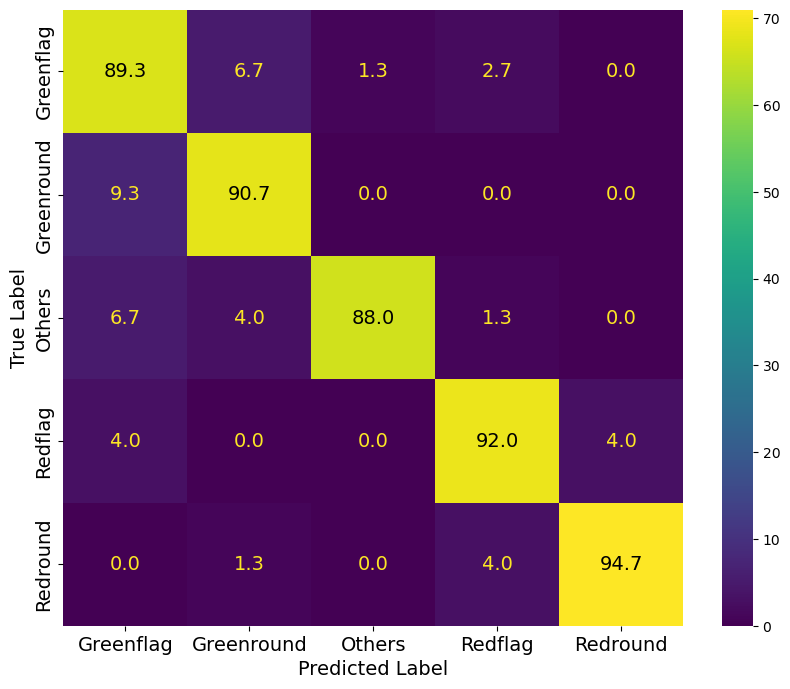

In [14]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

cm_percentage = cm / np.sum(cm, axis=1)[:, np.newaxis]  # Convert to percentages


# Assuming 'cm' is your confusion matrix and 'Val_gen' is your data generator with class indices
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(cm, annot=False, fmt="d", cmap="viridis", 
            xticklabels=sorted(Val_gen.class_indices, key=Val_gen.class_indices.get), 
            yticklabels=sorted(Val_gen.class_indices, key=Val_gen.class_indices.get), ax=ax)

# Annotate each cell with the numeric value using matplotlib
# "+ 0.5" is required to make sure the values are centered
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = "black" if i == j else "#FCE625"  # Yellow color for off-diagonal, black for diagonal
        ax.text(j + 0.5, i + 0.5, format(cm_percentage[i, j] * 100, '.1f'),
                ha="center", va="center", color=color, fontsize=14)

# Increase tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

plt.ylabel('True Label',fontsize=14)
plt.xlabel('Predicted Label',fontsize=14)
plt.show()

# Save the plot to a file
ax.figure.savefig('CNN_confusion.png', bbox_inches='tight')

In [67]:
# Calculate validation accuracy
val_accuracy = accuracy_score(true_labels, predicted_classes)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.9093


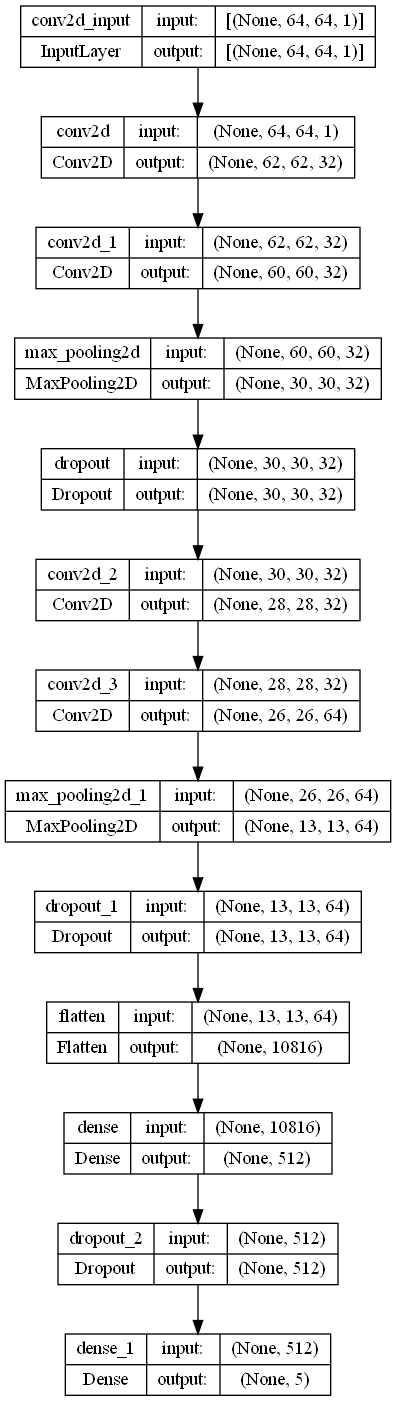

In [32]:
# Display model structure

# Generate a plot of the model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Optionally display the image in the notebook
from IPython.display import Image
Image(filename='model_structure.png')